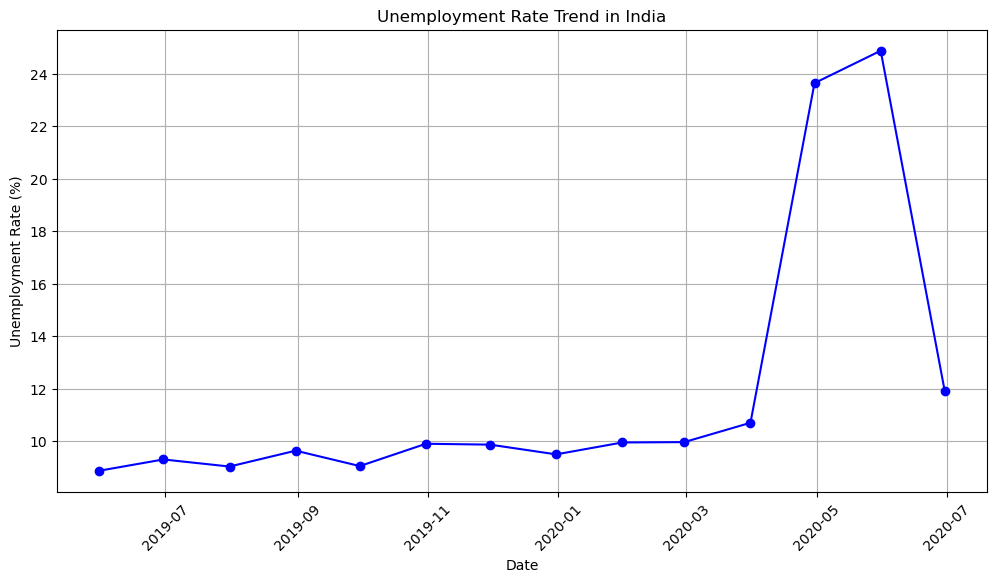

📊 Model Evaluation:
✅ Mean Absolute Error (MAE): 4.7878
✅ Mean Squared Error (MSE): 33.2061
✅ R² Score: 0.2645


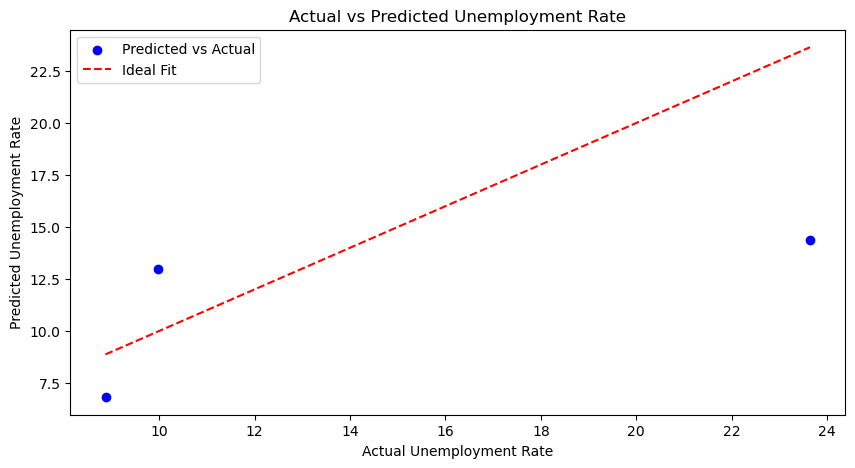

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("E:/projects/Unemployment in India.csv.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"].str.strip(), format="%d-%m-%Y")

# Drop missing values
df = df.dropna()

# Aggregate unemployment rate by date (National trend)
df_grouped = df.groupby("Date")["Estimated Unemployment Rate (%)"].mean().reset_index()

# 📊 Plot Unemployment Rate Trend
plt.figure(figsize=(12, 6))
plt.plot(df_grouped["Date"], df_grouped["Estimated Unemployment Rate (%)"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trend in India")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 📌 Prepare Data for Machine Learning
df_grouped["Days"] = (df_grouped["Date"] - df_grouped["Date"].min()).dt.days  # Convert date to numerical days
X = df_grouped[["Days"]]  # Features
y = df_grouped["Estimated Unemployment Rate (%)"]  # Target

# Split data into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# 📌 Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

# 📊 Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Ideal Fit")
plt.xlabel("Actual Unemployment Rate")
plt.ylabel("Predicted Unemployment Rate")
plt.title("Actual vs Predicted Unemployment Rate")
plt.legend()
plt.show()
